# Phase IV: Modeling & Results

In this notebook, I modeled the data and generated predictions using both Logistic Regression and Random Forest classifiers. Each model utilized the TF-IDF vectorizer, as I wanted to examine the weighted importance of words relative to their frequency in the documents. I also chose to run the models with their default parameters as well, in order to see the difference in performance that tuning parameters can produce.

---

### Importing Packages & Libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import stop_words
import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Reading in the Data:

In [2]:
df = pd.read_csv('./Datasets/Final_Reddit_Dataset_CLEAN.csv')
df.head()

,author,domain,num_comments,title,subreddit,url,subreddit_class,word_count,num_stopwords
0,neutronfish,worldofweirdthings.com,7,"Scientists and bureaucrats are really, really ...",EverythingScience,https://worldofweirdthings.com/2018/10/03/the-...,0,26,7
1,mvea,techdirt.com,43,School Boots Professor Off Campus After He Exp...,EverythingScience,https://www.techdirt.com/articles/20181209/145...,0,14,0
2,KnowableMag,sciencenews.org,4,A gut-brain link for Parkinson’s gets a closer...,EverythingScience,https://www.sciencenews.org/article/parkinsons...,0,20,5
3,BlankVerse,theguardian.com,0,The untold story of how India's sex workers pr...,EverythingScience,https://www.theguardian.com/global-development...,0,33,11
4,clayt6,astronomy.com,2,Satellite images of penguin poop-stains in Ant...,EverythingScience,http://www.astronomy.com/news/2018/12/penguin-...,0,42,17


### Modeling

In [3]:
X = df['title']
y = df['subreddit_class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [5]:
tf = TfidfVectorizer()
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

### Logistic Regression: Default Parameters

In [6]:
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

lr.fit(X_train_tf, y_train)

print('LogReg Train Score:', lr.score(X_train_tf, y_train))
print('LogReg Test Score:', lr.score(X_test_tf, y_test))

LogReg Train Score: 0.9164926931106472
LogReg Test Score: 0.7035490605427975


### Logistic Regression: Optimized Parameters

In [7]:
logreg_pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

params={
    'tf__stop_words': [None], # 'english'
    'tf__max_features': [None], # 5000, 2000, 3000, 4000
    'tf__ngram_range': [(1, 1), (1, 2), (1, 3)], # (1, 5), (1, 4)
    #'tf__max_df': [2, 5, 7],
    #'tf__min_df': [1, 2, 3],
    'tf__smooth_idf': [True, False],
    'lr__class_weight': [None], # {1: .45}
    'lr__penalty': ['l2', 'l1'],
    'lr__C': [1.0, .5, .01]
}
gs_lr_tf = GridSearchCV(logreg_pipe, param_grid=params, return_train_score=True)
gs_lr_tf_fit = gs_lr_tf.fit(X_train, y_train)

print('GridSearch Best Score:', gs_lr_tf.best_score_)
print('GridSearch Best Params:',gs_lr_tf.best_params_)
print()
print('LogReg Train Score:', gs_lr_tf.score(X_train, y_train))
print('LogReg Test Score:', gs_lr_tf.score(X_test, y_test))

lr_preds = gs_lr_tf.predict(X_test)

GridSearch Best Score: 0.7042449547668754
GridSearch Best Params: {'lr__C': 0.5, 'lr__class_weight': None, 'lr__penalty': 'l2', 'tf__max_features': None, 'tf__ngram_range': (1, 2), 'tf__smooth_idf': True, 'tf__stop_words': None}

LogReg Train Score: 0.9227557411273486
LogReg Test Score: 0.7265135699373695


### Random Forest: Default Parameters

In [8]:
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

rf.fit(X_train_tf, y_train)

print('LogReg Train Score:', rf.score(X_train_tf, y_train))
print('LogReg Test Score:', rf.score(X_test_tf, y_test))

LogReg Train Score: 0.9791231732776617
LogReg Test Score: 0.6722338204592901


### Random Forest: Optimized Parameters

In [9]:
rf_pipe = Pipeline([
    ('tf', tf),
    ('rf', rf)
])

params={
    'tf__stop_words': [None], # 'english'
    'tf__max_features': [4000], # 3000, 5000
    'tf__ngram_range': [(1, 2), (1, 3), (1, 4)], # (1, 1), (1, 5)
    'tf__smooth_idf': [True], # False
    'rf__n_estimators': [10, 50], # 100
    'rf__criterion': ['gini', 'entropy'], # 
    'rf__max_depth': [None], # 1, 2, 3, 4
    'rf__max_features': ['auto'] #1.0, .5
}
gs_rf_tf = GridSearchCV(rf_pipe, param_grid=params, return_train_score=True)
gs_rf_tf.fit(X_train, y_train)

print('GridSearch Best Score:', gs_rf_tf.best_score_)
print('GridSearch Best Params:',gs_rf_tf.best_params_)
print()
print('RF Train Score:', gs_rf_tf.score(X_train, y_train))
print('RF Test Score:', gs_rf_tf.score(X_test, y_test))

rf_preds = gs_rf_tf.predict(X_test)

GridSearch Best Score: 0.6896311760612387
GridSearch Best Params: {'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__max_features': 'auto', 'rf__n_estimators': 50, 'tf__max_features': 4000, 'tf__ngram_range': (1, 3), 'tf__smooth_idf': True, 'tf__stop_words': None}

RF Train Score: 0.9930410577592206
RF Test Score: 0.7202505219206681


---

# Interpreting the Results

We know that the baseline accuracy of the data is .54. Judging from this, we can conclude that the models perform relatively well compared to the baseline.

### Confusion Matrices

Looking at the type I and type II errors, the logreg model errors were evenly matched. In the random forest model, we had more false negatives than false positives. 
For the purposes of this experiment, a false positive means that a claim is classified as substantiated when in fact it hasn’t been. This could be more or less dire depending on the situation, but in general we should be optimizing for specificity here.

In [10]:
# Logistic Regression Predictions

cm_lr = confusion_matrix(y_test, lr_preds)
lr_df = pd.DataFrame(cm_lr, columns=['pred_neg', 'pred_pos'], index=['actual_neg', 'actual_pos'])
lr_df

,pred_neg,pred_pos
actual_neg,195,65
actual_pos,66,153


In [11]:
# Random Forest Predictions

cm_rf = confusion_matrix(y_test, rf_preds)
rf_df = pd.DataFrame(cm_rf, columns=['pred_neg', 'pred_pos'], index=['actual_neg', 'actual_pos'])
rf_df

,pred_neg,pred_pos
actual_neg,207,53
actual_pos,81,138


### Cross-Validation Statistics

In [12]:
# Gridsearched Logistic Regression model:

logreg_scores = pd.DataFrame(gs_lr_tf.cv_results_)

logreg_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__class_weight,param_lr__penalty,param_tf__max_features,param_tf__ngram_range,param_tf__smooth_idf,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.024610,0.001400,0.008899,0.001153,1,None,l2,None,"(1, 1)",True,...,0.684760,0.682008,0.693111,0.013778,7,0.944619,0.945720,0.941606,0.943982,0.001739
1,0.023050,0.000179,0.008247,0.000183,1,None,l2,None,"(1, 1)",False,...,0.678497,0.679916,0.686152,0.009825,12,0.951933,0.950939,0.946820,0.949897,0.002214
2,0.058893,0.001606,0.014347,0.000126,1,None,l2,None,"(1, 2)",True,...,0.695198,0.684100,0.693111,0.006657,7,0.985371,0.983299,0.982273,0.983648,0.001289
3,0.063200,0.001044,0.015784,0.001011,1,None,l2,None,"(1, 2)",False,...,0.699374,0.679916,0.693111,0.009319,7,0.990596,0.987474,0.986444,0.988171,0.001765
4,0.105394,0.005766,0.019587,0.000051,1,None,l2,None,"(1, 3)",True,...,0.691023,0.686192,0.693111,0.006653,7,0.994775,0.994781,0.992701,0.994086,0.000979


In [13]:
# Gridsearched Random Forest model:

rf_scores = pd.DataFrame(gs_rf_tf.cv_results_)

rf_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__criterion,param_rf__max_depth,param_rf__max_features,param_rf__n_estimators,param_tf__max_features,param_tf__ngram_range,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.090853,0.000979,0.017822,0.001074,gini,None,auto,10,4000,"(1, 2)",...,0.659708,0.619247,0.645790,0.018748,11,0.982236,0.980167,0.976017,0.979473,0.002586
1,0.134788,0.001144,0.021213,0.000157,gini,None,auto,10,4000,"(1, 3)",...,0.651357,0.629707,0.647878,0.013612,9,0.979101,0.977035,0.971846,0.975994,0.003052
2,0.182759,0.002244,0.025762,0.000197,gini,None,auto,10,4000,"(1, 4)",...,0.649269,0.629707,0.639527,0.007982,12,0.978056,0.971816,0.972888,0.974254,0.002724
3,0.220208,0.000967,0.025358,0.000074,gini,None,auto,50,4000,"(1, 2)",...,0.672234,0.684100,0.677105,0.005066,6,0.995820,0.996868,0.995829,0.996173,0.000492
4,0.266301,0.001148,0.030123,0.000121,gini,None,auto,50,4000,"(1, 3)",...,0.693111,0.679916,0.689631,0.006948,1,0.996865,0.996868,0.995829,0.996521,0.000489


### Top Words

Both models performed better when stop words were left in. This was beneficial for performance, but not so much for interpretability. To that end, I pulled the most used words for each subreddit (sans stop words) into the charts in __figure 1__ and
__figure 2__, along with the best predictors and their logreg coefficients.

### Figure 1

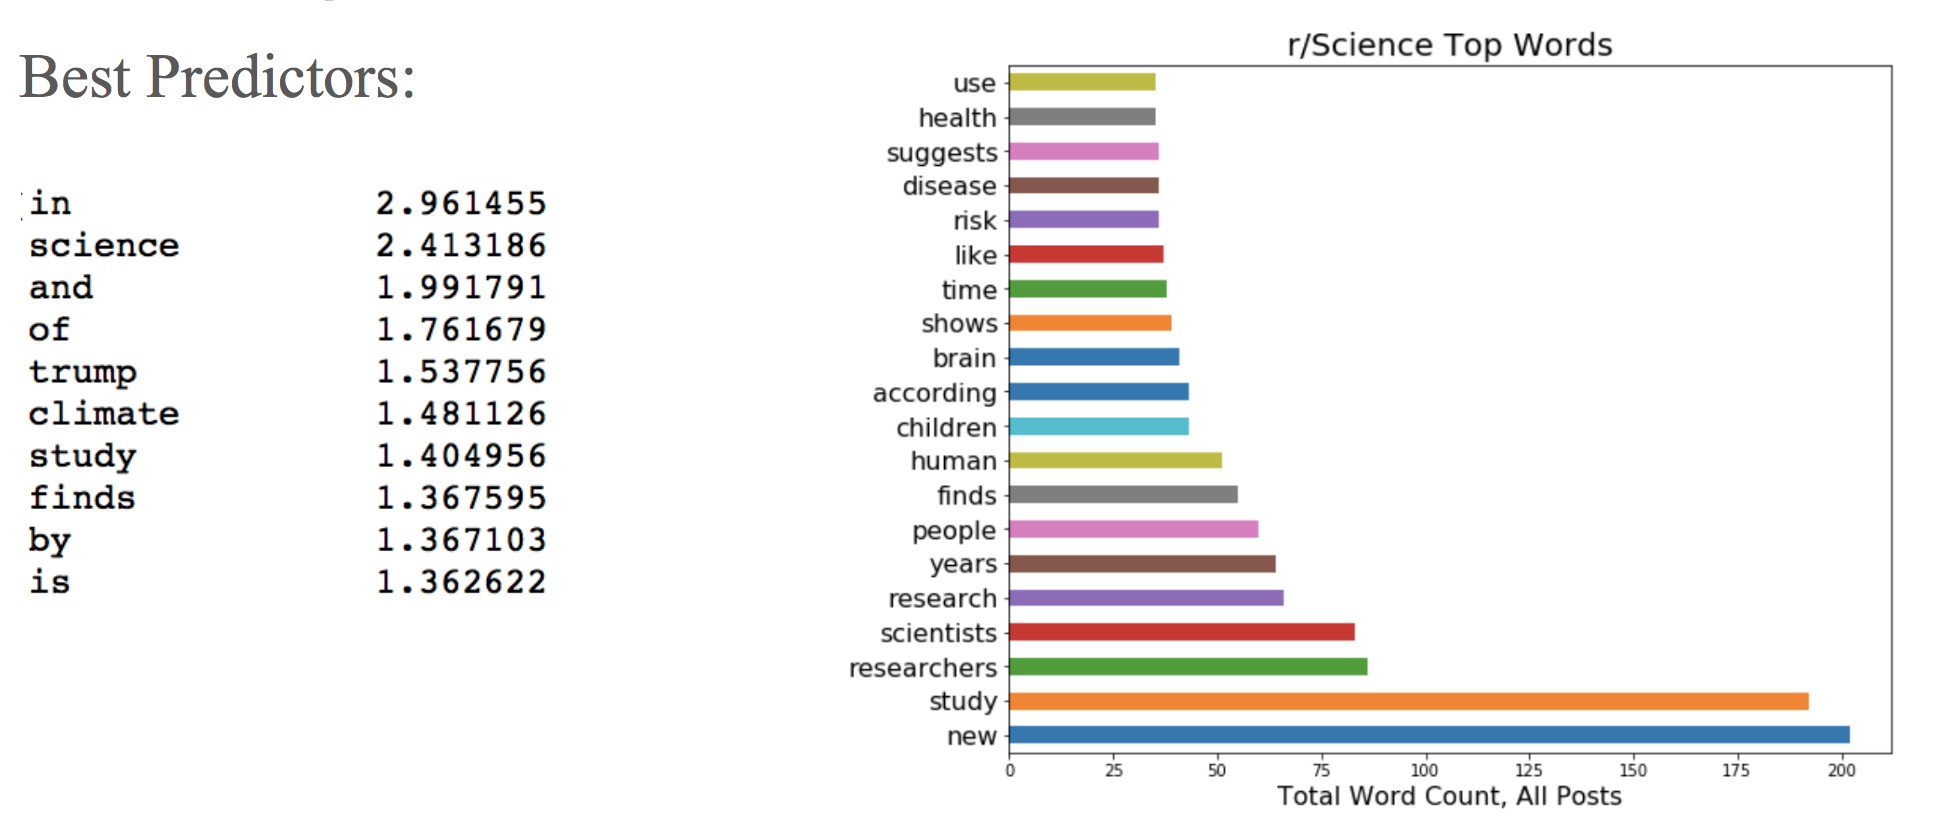

### Figure 2

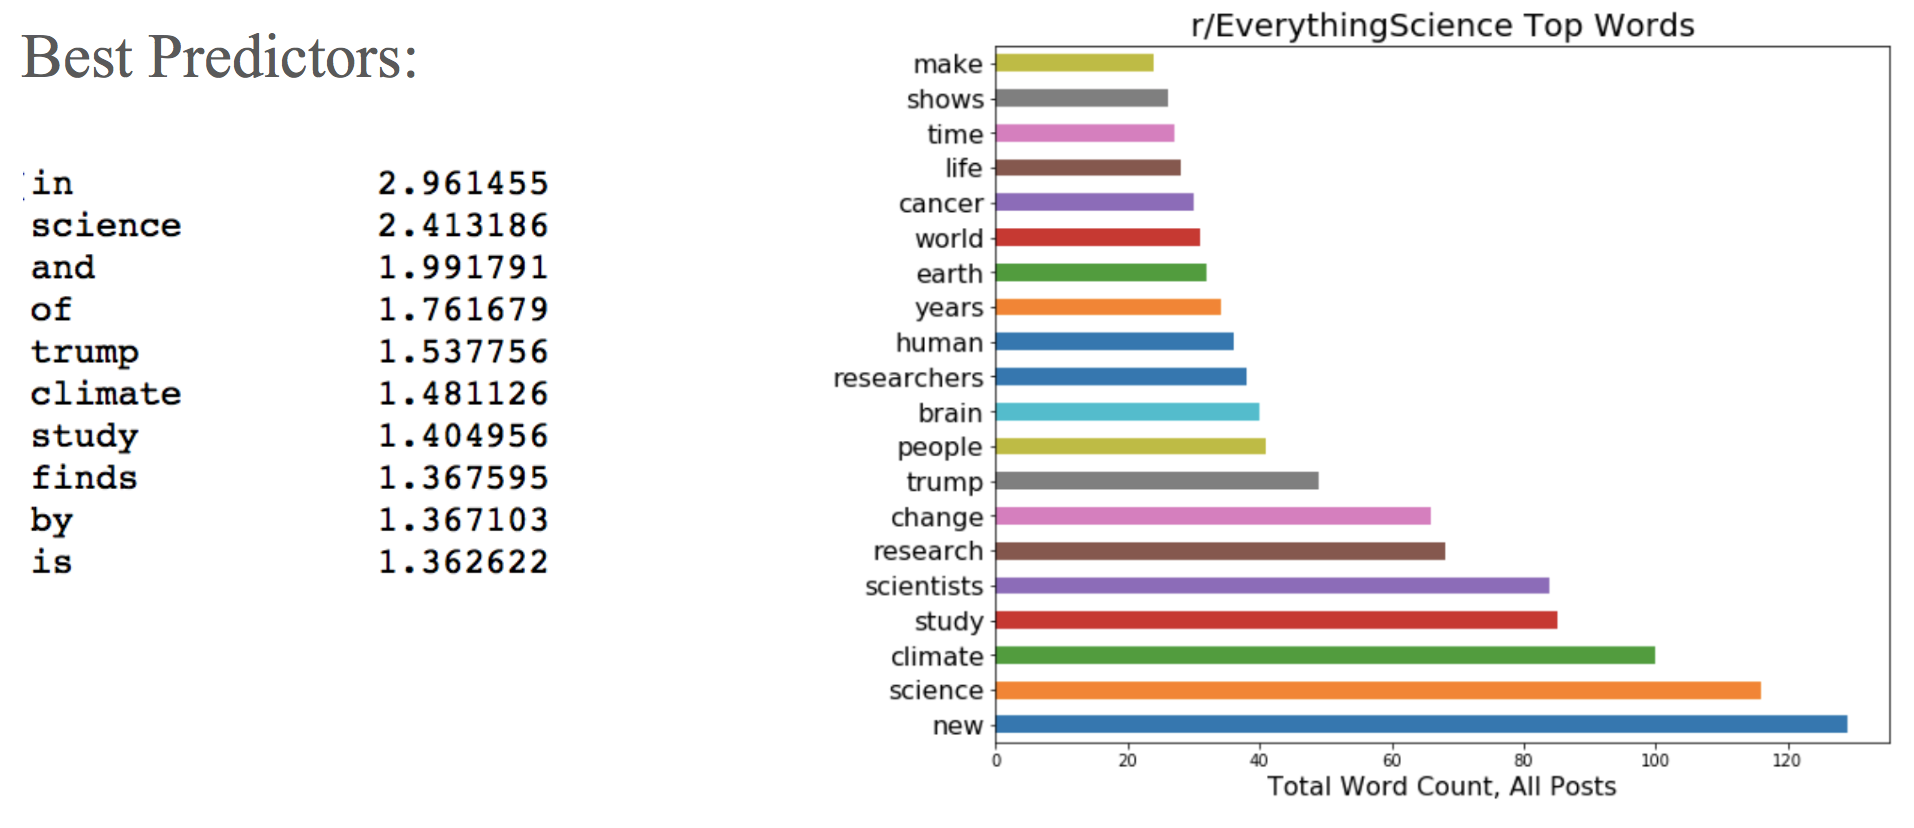

# Conclusion

While the models do improve on baseline accuracy in their ability to make predictions, their performance could be improved. This report concludes that text alone is not the best indicator of class.

Guidelines for future modeling experimentation:

-   Test the models on many kinds of subreddits, not just like ones.

-   Incorporate additional features into the X variable.

-   Format / transform documents prior to model fitting.
